<h1>Loan Prediction using Machine Learning</h1>

In [2]:
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
train = pd.read_csv("/home/ubuntu/love/ml/loan_prediction/train.csv")
test  = pd.read_csv("/home/ubuntu/love/ml/loan_prediction/test.csv")

<h1>Getting insight of Data</h1>

In [4]:
train.columns #all columns in dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.sample(5)  #to display any 5 random rows from dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
545,LP002767,Male,Yes,0,Graduate,No,2768,1950.0,155.0,360.0,1.0,Rural,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
422,LP002361,Male,Yes,0,Graduate,No,1820,1719.0,100.0,360.0,1.0,Urban,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


In [6]:
train.info() #to get type of each feature object means that it is categorical data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


<h1>Data Visualisation</h1>
It helps to determine how each feature in dataset  is effecting the our loan prediction.
<br>Help to built us Hypothesis.

<h3>Target variable</h3>
<br>Is dependent variable which we want to predict in this case it is loan status .We want to predict loan_status of an individual based on features provided.

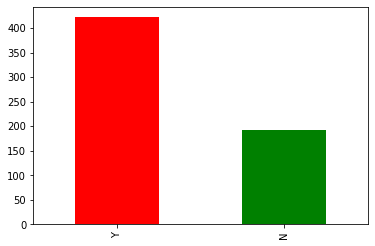

In [8]:
train["Loan_Status"].value_counts().plot.bar(color=["red","green"])
#we will plot count of loan approved and not approved by bank

In [9]:
(train["Loan_Status"]=="Y").value_counts()
#about 422 loans are approned by bank
#and 192 loans are rejected 

True     422
False    192
Name: Loan_Status, dtype: int64

Thus ,loan approval rate is more than rejection 

<h3>Independent Variable (Categorical)</h3>


Now we will plot categorical variable to know about how each category of a feature is involed in loan taking.

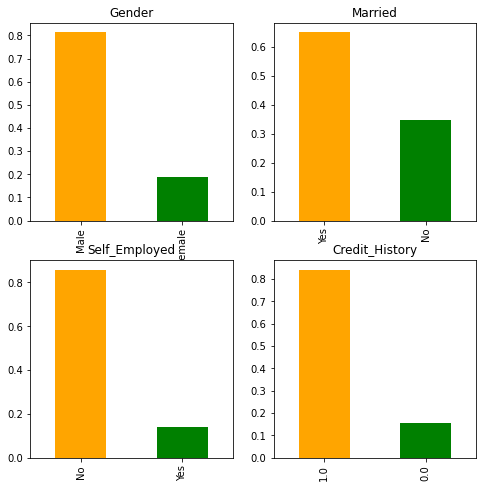

In [10]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Gender",color=["orange","green"])
plt.subplot(222)
train["Married"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Married",color=["orange","green"])
plt.subplot(223)
train["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Self_Employed",color=["orange","green"])
plt.subplot(224)
train["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Credit_History",color=["orange","green"])
plt.show()

<h2>What we observe?</h2>
<ul>
    <li>Male applying for loan are more than Female.About 80% .</li>
    <li>Almost 400 individual applaying for loan are marrried about 65% .</li>
    <li>Self Employed individual take more loan .About 85% .</li>
    <li>Around 85% applicants have repaid their debts.</li>
</ul>

<h3>Independent Variable(Ordinal)</h3>

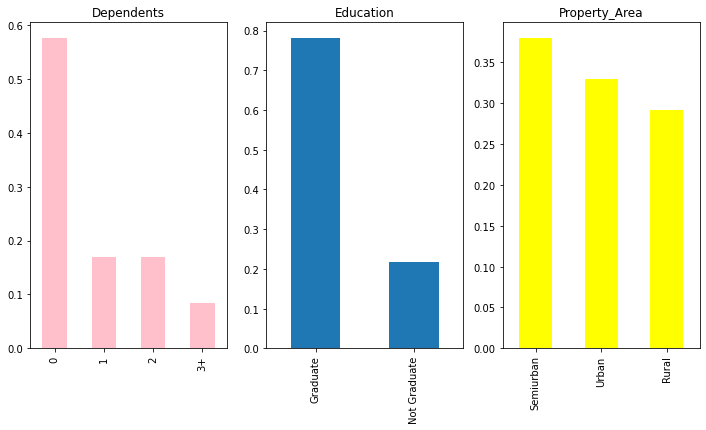

In [11]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="pink",title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(12,6),title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="yellow",title="Property_Area")

#DependentsEducation

<ul>
    <li>Most appliers have no dependencies.</li>
    <li>Graduate People apply more for loan than Undergraduate.About 80%.</li>
    <li>About 40% loan are from Semiurban area</li>
</ul>

<h3>Independent Variable (Numerical)</h3>

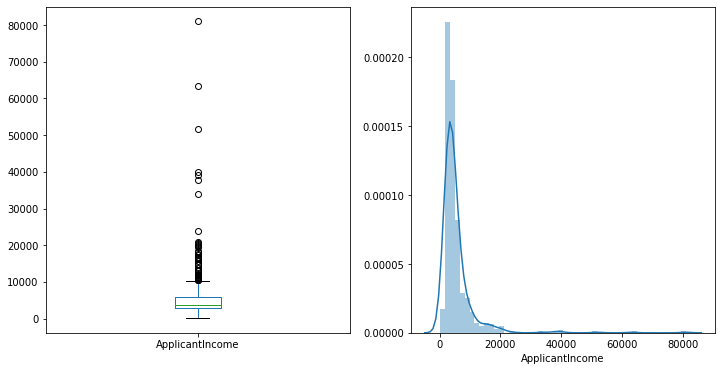

In [12]:
import seaborn as sns
plt.figure(1)
plt.subplot(121)
train["ApplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(train["ApplicantIncome"])
plt.show()

<h3>We can see that applicant Income is not a normal distribution .From box plot it is clear there a lot extreme values.We need to normalise it. </h3>

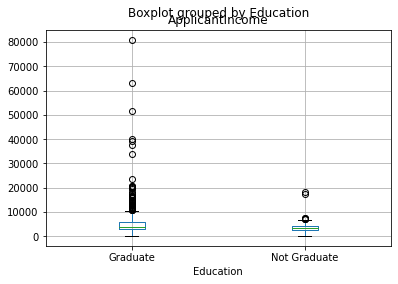

In [13]:
train.boxplot(column='ApplicantIncome', by = 'Education')
# we observe that outliners in apllicant income is because of graduate person with high income.

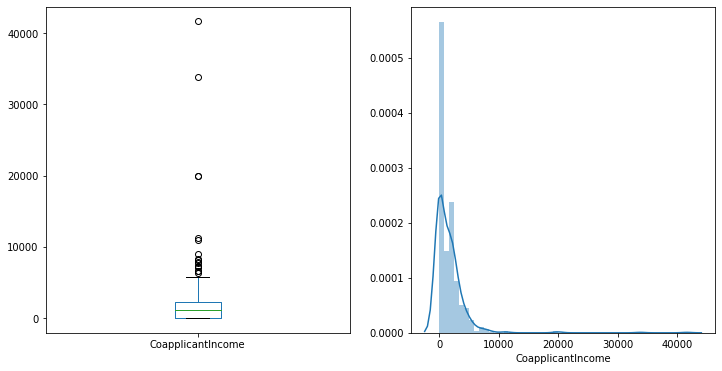

In [14]:
plt.figure(1)
plt.subplot(121)
train["CoapplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(train["CoapplicantIncome"])
plt.show()
#Not a normal distribution

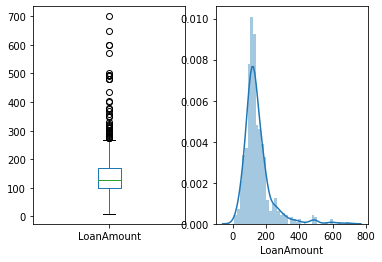

In [15]:
plt.figure(1)
plt.subplot(121)
train["LoanAmount"].plot.box()
plt.subplot(122)
sns.distplot(train["LoanAmount"])
plt.show()
#it's also not a normal distrubution 

<h1>Now ,we will do bivariate Analysis</h1>

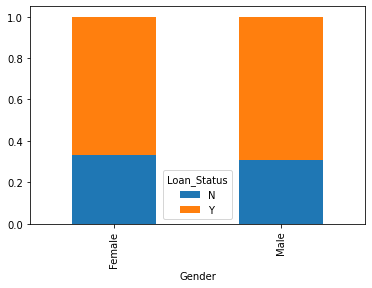

In [16]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

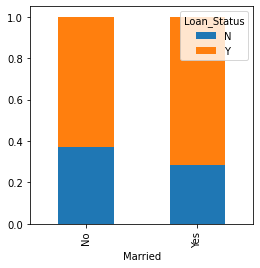

In [17]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

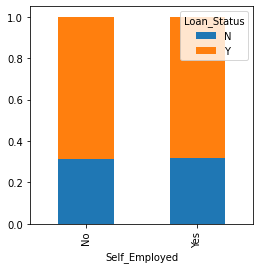

In [18]:
Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

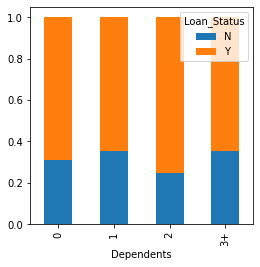

In [19]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<h3>Observations</h3>

<ul>
<li>Both gender have equal probability of loan approval.</li>
<li>Married loan are more approved than non - married.</li>
<li>Any kind of dependencies approval is same.</li>
<li>Self employed is same.</li>
</ul>

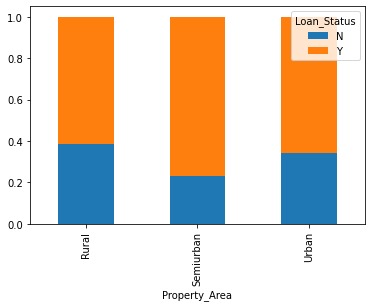

In [20]:
property_a = pd.crosstab(train["Property_Area"],train["Loan_Status"])
property_a.div(property_a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

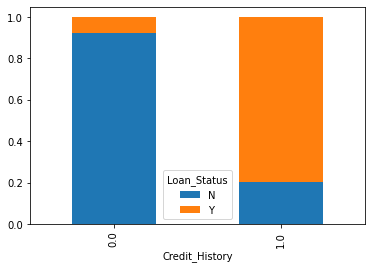

In [21]:
#Credit_History
credit_hist = pd.crosstab(train["Credit_History"],train["Loan_Status"])
credit_hist.div(credit_hist.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")

<h3>Observations</h3>
<ul>
<li>Semiurban area loan are more approved .</li>
<li>It seems people with credit history as 1 are more likely to get their loans approved.</li>
</ul>

As the target variable is 'Y' and 'N' we need to convert it to 1,0 .So,that we can apply algorithm.Similarly 
the Dependents contain 3+ we replace it with 3.

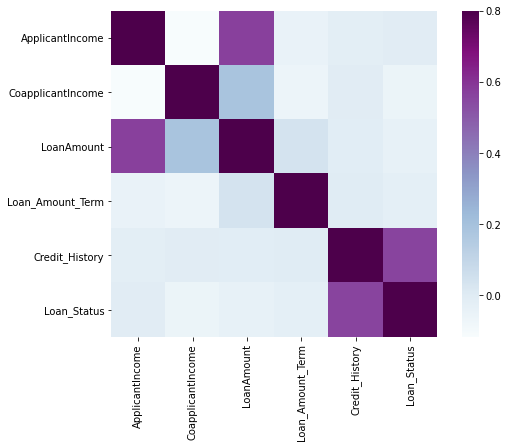

In [22]:
#encoding columns
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

 #plot corelation matrix
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

we observer apllication income and loan amount are corelated also credit_history and loan_status are corelated.

<h1>Data cleaning</h1>

In [23]:
is_na = train.isna().sum()
is_na

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As gender ,married ,Dependents,self_employed,Credit_history are Categorical we will replace missing with mode .The value which occur more or has high frequency.


In [24]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
print(train.shape)

(614, 13)


Now,numerical data LoanAmout as are not normaly distributed we will replace na with median. 

In [25]:
#normalise the outlier it gives normalsied distribution
train["LoanAmount"] = np.log(train['LoanAmount'])
test["LoanAmount"] = np.log(test['LoanAmount'])


<h1>Model Building!</h1>

In [26]:
train.head(2)
from sklearn import preprocessing


In [27]:
#drop Loan_ID
train = train.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID",axis=1)
print(train.shape)

(614, 12)


In [28]:
#seprate target colmn
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]
print(X.shape)
print(Y.shape)
print(X.columns)

(614, 11)
(614,)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


As Gender,Married,Education and Property_Area are Categorical we will make dummy variable for them.

In [29]:
X =pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [30]:
train.shape

(614, 21)

<h1>Logistic Regression</h1>

In [31]:
#we train our model on train set and make prediction on cross veidation set
#so plit train set into train and cross velidation set


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#split train & cv
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3) 

#model initialisation & fit

model = LogisticRegression()
model.fit(x_train,y_train)

#preict
predict_y = model.predict(x_cv)

#accuracy
acc = accuracy_score(y_cv,predict_y)

print("accuracy on cv",acc*100,'%')

#for test set we need to perform all operations on test set also 
#than predict 

accuracy on cv 64.32432432432432 %


<h1>Logistic Regression using stratified k-folds cross validation.</h1>

In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
acc=0
for train_index,test_index in kf.split(X,Y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=Y.loc[train_index],Y.loc[test_index]
    model = LogisticRegression(max_iter=150,random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    acc = acc+score
    print('accuracy_score',score)
    i+=1 
    
print("Mean accu",acc/5 *100,'%')


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7868852459016393
Mean accu 80.77835532453686 %


<h1>Some other model that can be tried are</h1>
<br>Decision Tree
<br>Random Forest
<br>XGBoost

In [ ]:
we are done 😃!